<h1><center>Public sentiments on Elon Musk after the acquisition of Twitter</center></h1>


## Introduction and background
On October 27th 2022, Elon Musk, CEO of Tesla completed his acquisition of Twitter. Twitter is a major social media platform which connects people from all across the globe by allowing its users to share their thoughts known as 'tweets' with others. It is one of the largest social media platforms used by millions of people. Elon musk, labelled one of the world's richest people by Forbes, is a multi billionaire known for his eccentric actions and the co-founder and CEO of Tesla, an electric vehicle manufacturer. 

After the takeover of Twitter, Elon Musk, in a controversial move started laying off many former Twitter employees despite his initial claims of buying Twitter to help people. This has sparked many opinions about the billionaire, with some criticising his actions while others defending it. Hence, I decided to undertake this research topic as I want to find out the general public opinion of Elon Musk, considering the duality of the comments about him as well as the opinions of the current state of Twitter. I hope to collect sufficient data and present them in a manner that is simple to understand at a glance.

### Aims
My aim is to explore the public sentiment on multi-billionaire Elon Musk before and after his acquisition of Twitter and the sentiments towards Twitter now. This can help to show whether there was any shift in public sentiments before the acquisition and whether he was always disliked by the public even before the takeover. I will be using what I have learnt in the module and perform some simple data analysis.

To achieve my aim, the following considerations have to be met: 
<ol> 
    <li>Understanding the ethical concerns and terms of service regarding web scraping and using data on social media sites</li>
    <li>Deciding on the social media site to scrape and then gather the data to for analysis</li>
    <li>Perform some data analysis on possible trends from the gathered data and visualise patterns</li> 
</ol>

## Choice of Data 
As of writing the report, Twitter is my main source of data for public opinions. The reasons are that:
<ol>
    <li>Twitter is one of the most popular social media websites with millions of people using it</li>
    <li>Tweets posted by anyone are publicly available for view</li>
    <li>Tweets can also be filtered easily using keywords or hastags</li>
    <li>Tweets from as long ago as 2016 can still be retrieved as long as the original author did not delete them</li>
</ol>

Within Twitter's massive ocean of tweets, I have chosen two specific timeframes to compare: 
<ol>
    <li>1.The time after October 27 2022, when Elon Musk completed his acquisition of Twitter for a total of 44 billion      dollars</li>
    <li>2. The timeframe before his complete acquisition the period before October 27.</li>
</ol>
    These two timeframes will let us know whether there was a shift in public perception towards Elon Musk and Twitter in general. I have considered using Facebook or Instagram for my dataset as well. However, since the topic is about Twitter, I think it would be better to obtain my dataset from Twitter itself as it is more relevant to my research topic.

### Ethical considerations
According to my research, webscraping is legal and allowed on Twitter as long as no sensitive or non-public information is scraped. I understand the dangers of data as seen from the many data leaks and attacks in recent years. In the wrong hands, data can prove to be malicious and might negatively impact others. Considering the usage of the data I am gathering, I conclude that there is minimal potential for malicious implications as the data is solely used for my academic assignment and analysis. Any modifications I will be doing on the tweets are only for clean up purposes to assist in analysis.

## Webscraping Process
For my webscraping, I will be using Snscrape. Snscrape lets us scrape tweets from any time range letting us grab tweets from the time frame that we want. Snscrape also has no limits on the number of tweets we can scrape [[1]](#ref-1). However, since it lacks certain functionalities by itself, we will have to make use of other libraries such as matplotlib and pandas to aid us in our data analysis process. I also choose to use Snscrape as it does not require a developer key which might take some time for me to obtain. The sentiment pipeline that I will be using is a roBERTa-base model which has been trained on an estimated 58 million tweets and finetuned for sentimental analysis using TwittEval benchmark. [[2]](#ref-2)

In [1]:
#getting required libraries and packages
!pip install transformers pandas matplotlib wordcloud palettable snscrape tensorflow hvplot bokeh holoviews

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import numpy as np
import hvplot.pandas
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
! pip freeze > requirements.txt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bakab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sentiment_pipeline = pipeline(model='cardiffnlp/twitter-roberta-base-sentiment')

Downloading:   0%|          | 0.00/1.54k [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


### Creating a function for webscraping
The function below accepts the number of tweets to scrape, the search term, the start date and end date as inputs in order to carry out the webscraping process. The data is then saved to a dataframe using functions from pandas [[3]](#ref-3)

In [4]:
def tweets(n_tweets, search_term, start_date, end_date):
    
    # get a dataframe of tweets using search terms
    # Make a list to append tweet data to
    tweets_list = []

    # Using TwitterSearchScraper to scrape data and append tweets to list
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{search_term} lang:en since:{start_date} until:{end_date}').get_items()):
        if i>n_tweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content])

    # Creating a dataframe from the tweets list above
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text'])
    return tweets_df

### Timeframe and obtaining tweets
The function created above is used to start scraping for our desired tweets. The first time frame will be a twelve days before 14th April 2022, the day where Elon started making plans to acquire Twitter. The second timeframe will be a week after Elon completed his acquisition of Twitter on the 27th October 2022. I chose to scrape tweets bit later after the purchase as I wanted to wait for sentiments to settle down instead of using initial sentiments which tend to be exaggerated or blown out of proportion.

In [5]:
# tweets regarding Elon Musk and Twitter before news of his plan to acquire Twitter
df_elon_april = tweets(5000, 'elon musk', '2022-04-1', '2022-04-13')
df_twitter_april = tweets(5000, 'twitter', '2022-04-1', '2022-04-13')
#tweets regarding Elon Musk and Twitter a week after the purchase
df_elon_nov = tweets(5000, 'elon musk', '2022-11-03', '2022-11-15')
df_twitter_nov = tweets(5000, 'twitter', '2022-11-03', '2022-11-15')

In [6]:
len(df_elon_april),len(df_twitter_april),len(df_elon_nov),len(df_twitter_nov)

(5001, 5001, 5001, 5001)

In [7]:
df_elon_nov.head()

Datetime             Tweet Id  \
0 2022-11-14 23:59:59+00:00  1592306380731465732   
1 2022-11-14 23:59:59+00:00  1592306380031287298   
2 2022-11-14 23:59:59+00:00  1592306379410243585   
3 2022-11-14 23:59:58+00:00  1592306378164559873   
4 2022-11-14 23:59:58+00:00  1592306378047356928   

                                                Text  
0  @TheDailyShow @elonmusk take note. This is act...  
1  @olivercameron @researcherger @WholeMarsBlog @...  
2  @GrootAssassino @_hawko @elonmusk Probably whe...  
3  @EricFrohnhoefer If you knew the problems with...  
4  @SawyerMerritt @elonmusk So, he says they're d...

In [8]:
df_twitter_april.tail()

Datetime             Tweet Id  \
4996 2022-04-12 23:23:06+00:00  1514021321549692934   
4997 2022-04-12 23:23:06+00:00  1514021320350224392   
4998 2022-04-12 23:23:06+00:00  1514021318177525763   
4999 2022-04-12 23:23:04+00:00  1514021312729075712   
5000 2022-04-12 23:23:04+00:00  1514021312448151558   

                                                   Text  
4996    @xoj9 @OfTheNightClub Twitter space (for now :)  
4997  So many of you AWESOME people are getting foll...  
4998  @amymaclane @thegoodgodabove I found you on Tw...  
4999  I just support this trend to the core!\nIt wil...  
5000  @sweeneyn26 Oh. I believe language like that i...

## Processing Data
In order to carry out our sentimental analysis, we would have to convert everything into lower case letters. Some tweets may also contain URLs. These should be removed to not affect the sentiment analysis.

In [9]:
#making a dictionary for easy reference to dataframes
df_dict = {
    'Elon Musk April': df_elon_april,
    'Twitter April' : df_twitter_april,
    'Elon Musk November': df_elon_nov,
    'Twitter November': df_twitter_nov
}

In [10]:
#keep tweets containing names of interest
keep_rows = {
    'Elon Musk April': 'elon|musk',
    'Twitter April': 'twitter',
    'Elon Musk November': 'elon|musk',
    'Twitter November': 'twitter'
}

In [11]:
#cleaning the data
for key, df in df_dict.items():
    print(key)
    df_dict[key] = (
        df
        #making everything lowercase letter
        .assign(
            Text = lambda x: x['Text'].str.lower(),
            keep_flag = lambda x: x['Text'].str.contains(keep_rows[key]) 
        )
        #keeping rows with names of interest
        .query("keep_flag == True")
        #removing URLs
        .assign(
            Text = lambda x: x['Text'].str.replace(
                r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', 
                '', 
                regex=True)
            )
        ).drop(["keep_flag"], axis="columns")
    count = len(df_dict[key])
    print("%d tweets left of %d after cleaning data" % (count,5001))

Elon Musk April
4997 tweets left of 5001 after cleaning data
Twitter April
5001 tweets left of 5001 after cleaning data
Elon Musk November
5001 tweets left of 5001 after cleaning data
Twitter November
5001 tweets left of 5001 after cleaning data


## Data Analysis
### Sentiment Analysis
As mentioned before the sentiment analysis will be conducted using a roBERTa-base sentiment pipeline which has been pre-trained on around 58 million tweets. This makes it a suitable model to conduct our sentiment analysis with.

In [12]:
for key, df in df_dict.items():
    df_dict[key] = (
        df_dict[key]
        # Apply the pre-trained sentiment model
        .assign(sentiment=lambda x: x['Text'].apply(lambda s: sentiment_pipeline(s)))
        # Get the sentiment label
        .assign(sentiment_label=lambda x: x['sentiment'].apply(lambda s: s[0]['label']))
        # Get the sentiment score
        .assign(sentiment_score=lambda x: x['sentiment'].apply(lambda s: s[0]['score']))
    )
    # Recode the sentiment labels to make it easier to understand
    df_dict[key] = df_dict[key].assign(
        sentiment_label=np.where(
            df_dict[key]['sentiment_label']=='LABEL_0', 'NEGATIVE', np.where(
                df_dict[key]['sentiment_label']=='LABEL_2', 'POSITIVE', 'NEUTRAL'
            )
        )
    )

In [13]:
dfc = pd.concat([
    df_dict['Elon Musk April'].query('sentiment_score>0.8')['sentiment_label'].value_counts(),
    df_dict['Twitter April'].query('sentiment_score>0.8')['sentiment_label'].value_counts(),
    df_dict['Elon Musk November'].query('sentiment_score>0.8')['sentiment_label'].value_counts(),
    df_dict['Twitter November'].query('sentiment_score>0.8')['sentiment_label'].value_counts()
], axis=1)
dfc.columns = ['Elon Musk April', 'Twitter April', 'Elon Musk November', 'Twitter November']

In [14]:
dfc

Elon Musk April  Twitter April  Elon Musk November  Twitter November
NEUTRAL              1044            389                 528               314
NEGATIVE              420            818                 692               826
POSITIVE              388            637                 374               453

From the table we can get a good grasp of any changes in sentiment between the two timeframes. With this table we can then make a bar graph for easier visualization.

In [15]:
#creating a  bar graph
dfp = dfc/dfc.sum()
def hvplot(df):
    my_plot = df.T.hvplot.bar(
        rot = 90,
        title = 'Sentiment value of Tweets by ratio',
        color=["green","red","yellow"]
    )
    return my_plot
# display bar graph
display(hvplot(dfp))    

:Bars   [index,Variable]   (value)

For reasons unknown to me the graph output does not show up on PDF or upon reopening the ipynb file. In the event the plots are not showing in the notebook or PDF itself, I have attached a static image of the graph obtained from the code:
![Sentiment Graph](tweet_sentiment_ratio.png)

### Bar graph analysis
From the graph, we can observe a spike in negative sentiments for both Elon Musk and Twitter after the acquisition.It would seem that the general sentiments regarding both Elon Musk and Twitter has become more negative after the acquisition. This might be likely due to the mass layoffs that occurred after the Elon Musk acquired Twitter and charging a fee for verification[[4]](#ref-4) which led to the more negative sentiment now.

## WordCloud
I will also be making a wordcloud to gain a better insight into the positive tweets regarding Elon Musk after the acquisition. This is because there was actually an increase in positive tweets about Elon although not as high as the increase in negative tweets. Was this because of Elon's existing support base? As such I will make use of a wordcloud to glean more into the positive tweets. The following code helps us achieve this.[[5]](#ref-5)

In [16]:
import random
from palettable.colorbrewer.sequential import Greens_9, Oranges_9, Reds_7
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Greens_9.colors[random.randint(2,8)])

def orange_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Oranges_9.colors[random.randint(2,8)])

def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Reds_7.colors[random.randint(1,6)])

def produce_wordcloud(corpus, title, mask, color):
    plt.figure(figsize=(20, 10))
    #removing certain words
    mystopwords = set(STOPWORDS)
    mystopwords.add("fuck")
    mystopwords.add("fucking")
    mystopwords.add("shit")
#     corpus=dataframe.values.tolist()
#     corpus=','.join(x  for list_words in corpus for x in list_words)
    wordcloud = WordCloud(stopwords=mystopwords,max_font_size=None, max_words = 300, background_color='black', collocations=False,
                 mask = mask, width=2000, height=1000).generate(corpus)
    wordcloud.recolor(color_func=color)
    plt.axis("off")
    plt.title(title)    
    return plt.imshow(wordcloud, interpolation='bilinear')

In [17]:
df_elon_nov_positive = df_dict['Elon Musk November'][df_dict['Elon Musk November']['sentiment_label']=='POSITIVE']
elon_positive_nov = " ".join(comment for comment in df_elon_nov_positive.Text)

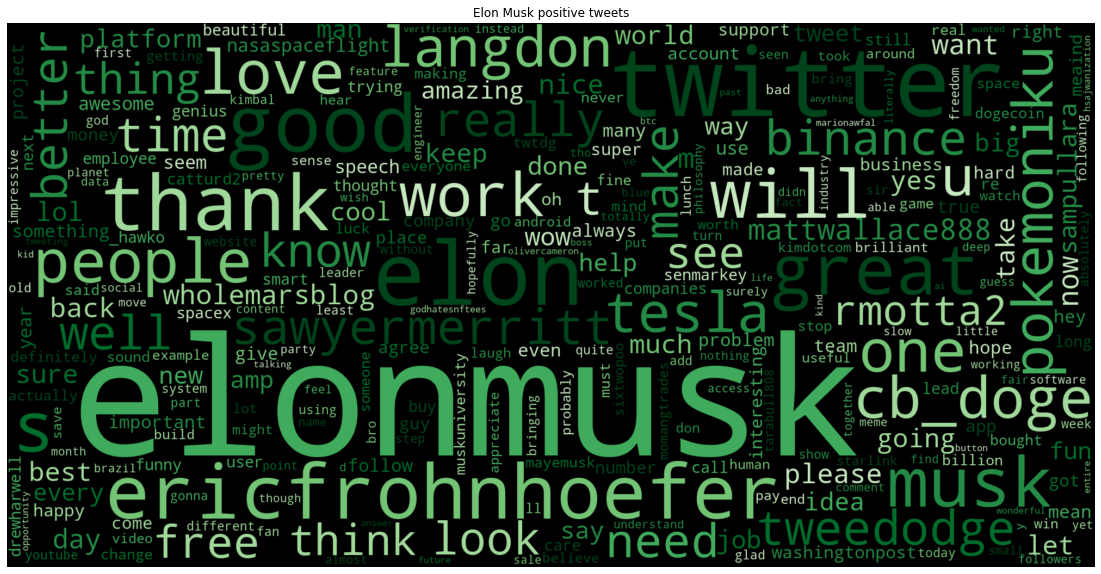

In [18]:
produce_wordcloud(elon_positive_nov,"Elon Musk positive tweets", None, green_color_func)

In [19]:
df_elon_nov_negative = df_dict['Elon Musk November'][df_dict['Elon Musk November']['sentiment_label']=='NEGATIVE']
elon_negative_nov = " ".join(comment for comment in df_elon_nov_negative.Text)

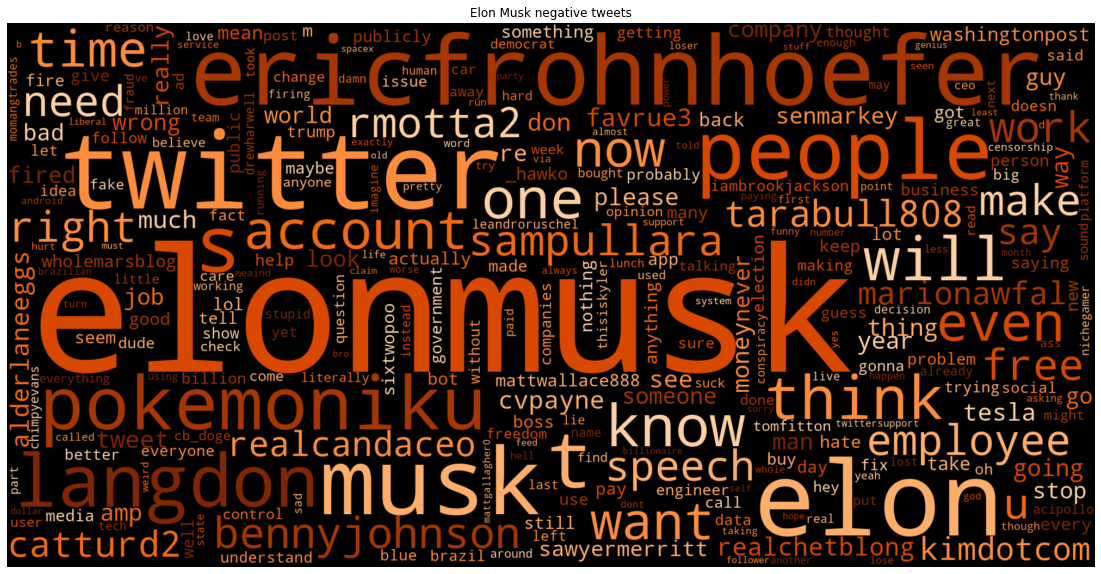

In [20]:
produce_wordcloud(elon_negative_nov,"Elon Musk negative tweets", None, orange_color_func)

### Analysis of wordclouds for Elon Musk
From the positive wordcloud in green above, we can genrally see many positive words about Elon Musk. However most of this words are descriptive and we are not able to infer about the reasons for the positive nature of the tweets. The name Eric Frohnhoefer shows up, who is an experienced software engineer at Twitter before the layoff. He was publicly laid of on Twitter after the takeoveer. His name showing up might mean that there are people who supported Elon's decision in firing the software engineer. All in all, it would seem that most of the positive remarks stem from his previous actions, as seen from the words, 'doge', a cryptocurrency he expressed interest in and 'tesla', the company he runs.

Looking at the negative wordcloud in orange we can see the name Eric Frohnhoefer show up again, this time occupying more of the cloud than the positive one. From here I can infer that there are more people who find the firing of Eric Frohnhoefer unjustified as opposed to those who support it. I am unaware of the other names that appear in the cloud and as such forming a definitive conclusion is hard. Hoever it is obvious that there are more people against the unjustified layoff of Eric Frohnhoefer. I will also make a wordcloud for the negative sentiments towards twitter in November to see if I can get more information.

In [21]:
df_twitter_nov_negative = df_dict['Twitter November'][df_dict['Twitter November']['sentiment_label']=='NEGATIVE']
twitter_negative_nov = " ".join(comment for comment in df_twitter_nov_negative.Text)

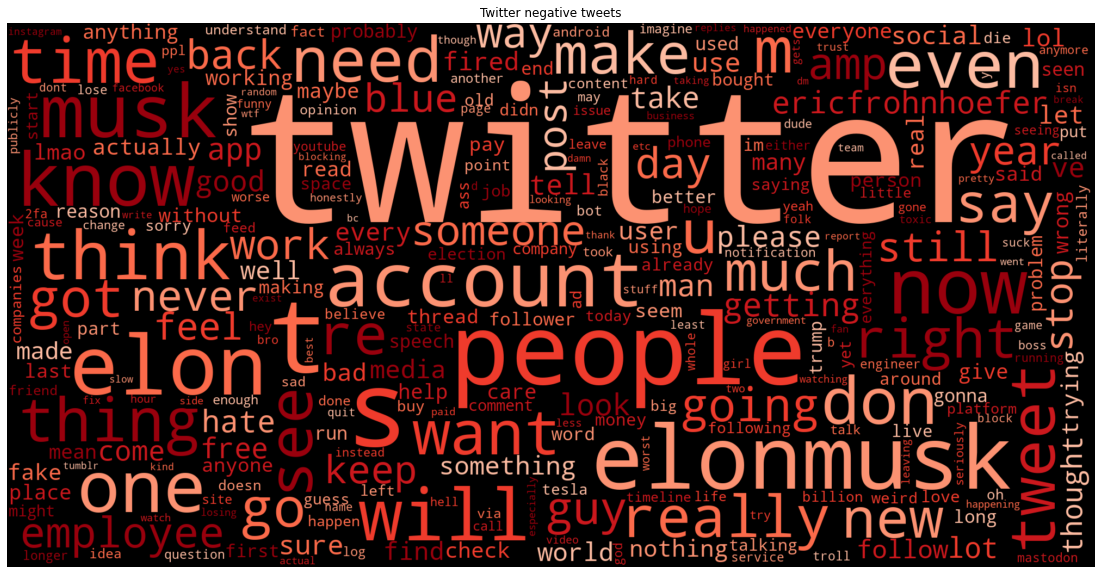

In [22]:
produce_wordcloud(twitter_negative_nov,"Twitter negative tweets", None, red_color_func)

### Analysis of wordcloud for Twitter
From the cloud, we can see that Elon Musk occupies much of the space as well, indicating that there might be a close association between the negative sentiments towards Twitter and Elon Musk himself. We can also observe the words 'employee' in the cloud closely relating to the mass layoffs that occured at Twitter after the takeover. It is safe to assume that the general public have a very bad impression of Twitter after Elon Musk's takeover.

### N-gram
For further analysis, I will make use of an n-gram. As defined by Wikipedia, an n-gram is a contiguous sequence of n items from a given sample of text or speech. In simpler terms, it helps find out commonly occurring words and sequences. This can give us a better idea of what the general public has to say about Elon Musk and the current state of Twitter. The function below setups the implementation for n-gram analysis.[[6]](#ref-6)

In [23]:
df_ngram_elon_apr = df_dict['Elon Musk April']
df_ngram_twitter_apr = df_dict['Twitter April']
df_ngram_elon_nov = df_dict['Elon Musk November']
df_ngram_twitter_nov = df_dict['Twitter November']

#removing intense language
stopWords = stopwords.words('english') + ['fuck']
#range of 2 and 3 as I am focusing on bigrams and trigrams
c_vec = CountVectorizer(stop_words=stopWords, ngram_range=(2,3))

def ngram_analysis(df):
    #matrix of ngrams
    ngrams = c_vec.fit_transform(df['Text'])
    #count frequency
    count_values = ngrams.toarray().sum(axis=0)
    #list of ngram
    vocab = c_vec.vocabulary_
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
    return df_ngram

We first start our analysis with Elon Musk. We will observe both the tweets before and after his acquisition of Twitter

In [24]:
 ngram_analysis(df_ngram_elon_apr).head(10)

frequency          bigram/trigram
0       1381       tedchris elonmusk
1        833               elon musk
2        430    synchro2021 elonmusk
3        113             free speech
4         96               musk sued
5         96          elon musk sued
6         95          tesla elonmusk
7         92  wholemarsblog elonmusk
8         92            elonmusk ask
9         88   tedchris elonmusk ask

In [25]:
ngram_analysis(df_ngram_elon_nov).head(10)

frequency                      bigram/trigram
0        529                           elon musk
1        408          ericfrohnhoefer pokemoniku
2        403  langdon ericfrohnhoefer pokemoniku
3        403             langdon ericfrohnhoefer
4        396                    elonmusk langdon
5        395    elonmusk langdon ericfrohnhoefer
6        201                 elonmusk sampullara
7        175               bennyjohnson catturd2
8        174       realchetblong favrue3 cvpayne
9        174               realchetblong favrue3

### Analysis of Elon Musk N-gram
From the tweets in April, we can gather that the main topic at that period was the TED interview that Elon Musk was being interviewed at the time. The words 'elonmmusk ask' also fits into this category. The main topic we can see is the suing of Elon Musk. This lines up with the events that happend in April where Elon Musk was sued for his delay in disclosing his stake in Twitter.
Next we take a look at the tweets in November. Again the name Eric Frohnhoefer shows up and seems to be the main topic. My guess is that there are people arguing over Elon Musk's decision to fire him publicly. I do not know of most of the other names and can only assume that they are either critics or supporters of Elon Musk. Next we look at ngrams for Twitter in April and November.

In [26]:
ngram_analysis(df_ngram_twitter_apr).head(10)

frequency     bigram/trigram
0        136          elon musk
1        115    twitter account
2         53            12 2022
3         52         us twitter
4         52        twitter see
5         50          follow us
6         48        use twitter
7         46              04 12
8         45  follow us twitter
9         44     people twitter

In [27]:
ngram_analysis(df_ngram_twitter_nov).head(10)

frequency     bigram/trigram
0        113          elon musk
1        106       twitter blue
2         81    twitter account
3         68       social media
4         57       like twitter
5         55   elonmusk twitter
6         44        use twitter
7         41  twitter employees
8         41     people twitter
9         41       back twitter

### Analysis of Twitter N-gram
From the ngramfor tweets regarding twitter in April, it seems that Elon Musk was mentioned quite a fair bit as well. This coincides with the tweets regarding Elon Musk in April as mentioned before. The rest of the ngram does not seem to have a clear topic or focus.
For the last ngram, we can see that twitter blue and elon musk shows up the most. Before Elon Musk's takeover, Twitter blue is a verification checkmark for people to prove that they are who they claim in order to prevent impersonations. However after the takeover, Elon Musk implemented an $8/month charge for the verification and allowing anyone to obatain this checkmark. Needless to say this was a source of contention on Twitter as seen from the ngram where it appears with the highest frequency. The next most common sequence is Elon Musk which makes sense given that he acquired Twitter a week before.

## Topic Modelling
Lastly I will conduct a topic modelling for further analysis. This can help glimpse the current topics that are discussed in our tweets. In this case, I will be using the Non-Negative Matrix Factorization (NMF) method. This is a matrix decomposition method which decomposes a matrix into the product of W and H of non-negative elements.

In [28]:
def print_topic_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                              for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [29]:
def topic_model(df):
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopWords, ngram_range=(2,3))
    nmf = NMF(n_components=5)
    pipe = make_pipeline(tfidf_vectorizer, nmf)
    pipe.fit(df['Text'])
    print_topic_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=5)

In [30]:
topic_model(df_ngram_elon_apr)

C:\Users\Bakab\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topic #0: sues elon musk, sues elon, investor sues, investor sues elon, disclosure stake
Topic #1: elon musk sued, musk sued, disclosing twitter, delay disclosing twitter, disclosing twitter stake
Topic #2: synchro2021 elonmusk, synchro2021 elonmusk hell, elonmusk hell, synchro2021 elonmusk oh, elonmusk oh
Topic #3: tedchris elonmusk, elonmusk ask, tedchris elonmusk ask, tedchris elonmusk would, elonmusk would
Topic #4: tesla kristennetten, tesla kristennetten gailalfaratx, kristennetten gailalfaratx, gailalfaratx yo_cybertruck, yo_cybertruck daelmor



C:\Users\Bakab\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
topic_model(df_ngram_elon_nov)

C:\Users\Bakab\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topic #0: alderlaneeggs bennyjohnson catturd2, marionawfal kimdotcom, realchetblong favrue3 cvpayne, favrue3 cvpayne, favrue3 cvpayne alderlaneeggs
Topic #1: langdon ericfrohnhoefer, langdon ericfrohnhoefer pokemoniku, ericfrohnhoefer pokemoniku, elonmusk langdon, elonmusk langdon ericfrohnhoefer
Topic #2: elonmusk rmotta2, rmotta2 urgent, elonmusk rmotta2 urgent, rmotta2 yesterday, elonmusk rmotta2 yesterday
Topic #3: binance elonmusk, tweedodge binance elonmusk, tweedodge binance, elonmusk good, binance elonmusk good
Topic #4: zebecprotocol 17, elonmusk zebecprotocol 17, zebecprotocol 17 time, elonmusk zebecprotocol, 17 time



C:\Users\Bakab\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Elon Musk topic model analysis
From the topic models for Elon Musk before the Twitter takeover, we can see some common topics. Mainly the topics at the time seem to be focused on the suing of Elon Musk. This also lines up with the ngram we explored earlier. After the takeover we can see the topics has shifted. Again the name of Eric Frohnhoefer is seen. I am unfmailiar with the other topics.

In [32]:
topic_model(df_ngram_twitter_apr)

C:\Users\Bakab\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topic #0: twitter welcome lapis, welcome lapis, welcome lapis lapis, lapis lapis, twitter welcome
Topic #1: twitter stake, musk sued, elon musk sued, disclosing twitter stake, disclosing twitter
Topic #2: investment advice, usdt exchange, crypto algo, investment advice follow, new algo detection
Topic #3: sues elon, sues elon musk, elon musk, elon musk delayed, musk delayed
Topic #4: twitter see, top story, realgilbert twitter see, realgilbert twitter, story realgilbert twitter



C:\Users\Bakab\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
topic_model(df_ngram_twitter_nov)

C:\Users\Bakab\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topic #0: twitter interaction, twitter interaction circle, circle generate, interaction circle generate, interaction circle
Topic #1: llc twitter, rex llc, rex llc twitter, llc twitter lmaoo, ugh llc twitter
Topic #2: mon nov, new system mon, 14 23, utc 2022, keep alive ping
Topic #3: woke twitter, woke twitter idk, twitter idk, one woke twitter, one woke
Topic #4: send twitter, hit send twitter, hit send, send twitter think, people hit



C:\Users\Bakab\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Twitter topic model analysis
Lastly we have our topic models for Twitter. From the tweets in April we can see that the suing of Elon Musk was a main topic as well especially since it was related to the Twitter acquisition. From the November tweets, there does not seem to be any topic relating to Elon Musk and I am unable to see any main points of topic.

## Limitations
Some limitations exist in this data exploration. For instance, 5000 tweets per topic may not neccessarily be enough of an indication of public perception given the millions of tweets that get sent out everyday. This might affect the accuracy of this analysis as the sample size might be insufficient to give us a more accurate conclusion. Applying the sentimental model on the 20000 tweets I scrapped also tend to take a while to load and scraping a higher number of tweets will increase this wait time further. Some tweets can also be sarcastic or mocking in nature and might have been wrongly classified by the sentiment model. Furthermore, there are multiple names present in the Elon Musk wordcloud and n-gram which I do not recognise. These could have affected my inference of the results. These are all points to take note of and possibly improve on in a future analysis.

## Conclusion
This data exploration has given me some new insights into the public perception of the current state of Twitter and Elon Musk's takeover of the company. From the analysis, it would seem that the perception is getting more negative towards both Elon Musk and Twitter. This is evident from the number of negative tweets increasing after the takeover. From the wordclouds we can also see the name Eric Frohnhoefer whose public firing might have led to a negative perception on both Elon Musk and Twitter. All in all, it would seem that Elon Musk's actions are closely associated with the public sentiments of Twitter as well. Only time will tell if this sentiment continues or changes in the future.

## References
<a id="ref-1">[1] https://www.freecodecamp.org/news/python-web-scraping-tutorial/</a> <br>
<a id="ref-2">[2] https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment</a> <br>
<a id="ref-3">[3] https://sophiamyang.medium.com/johnny-depp-v-amber-heard-twitter-sentiment-analysis-baa42c2e3cdd</a> <br>
<a id="ref-4">[4] https://www.nytimes.com/2022/11/21/technology/elon-musk-twitter-management.html</a> <br>
<a id="ref-5">[5] https://www.kaggle.com/code/hoshi7/nyc-jobs-interactive-maps-and-creative-wordclouds</a> <br>
<a id="ref-6">[6] https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5</a> <br>
<a id="ref-7">[7] https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5</a>